In [1]:
import numpy as np
import scipy as stat
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Regression algorithms
#MLR
df = pd.read_csv("/Users/users/Downloads/Demo Datasets/Lesson 4/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
    df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


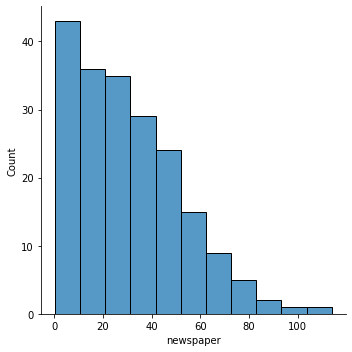

In [8]:
sns.displot(df['newspaper'])

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

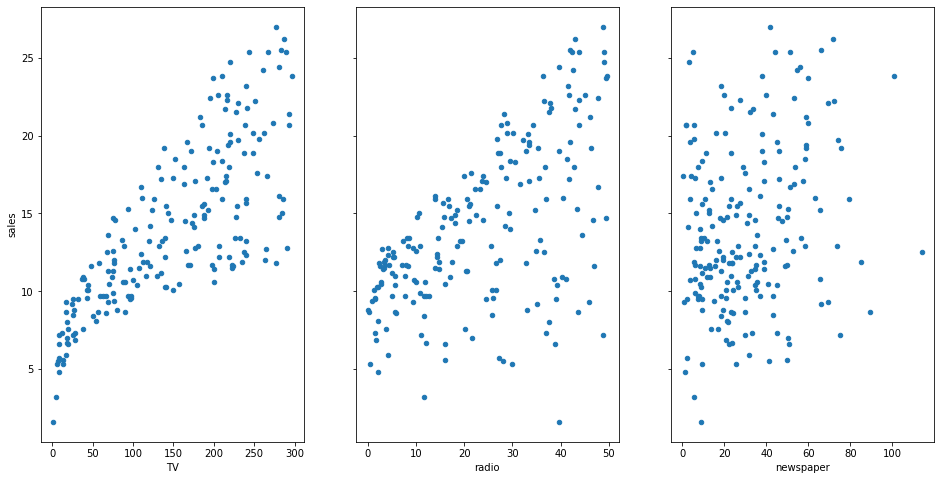

In [9]:
fig,axs = plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [10]:
x = df.drop("sales",axis=1)
y = df["sales"]

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 34)

In [13]:
x_train.shape

(160, 3)

In [14]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [15]:
preds = model.predict(x_test)

In [16]:
acc = r2_score(y_test,preds)

In [17]:
acc

0.8925087896627705

In [18]:
acc = r2_score(y_train,model.predict(x_train))

In [19]:
acc

0.8970495535067476

In [20]:
import statsmodels.formula.api as smf

In [21]:
#example 2 

In [22]:
df = pd.read_csv("/Users/users/Downloads/Demo Datasets/Lesson 4/bigmart_train.csv")

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
df["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype('category')

In [27]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [28]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
FDV60     9
NCF42     9
FDF56     9
         ..
DRF48     1
FDE52     1
FDN52     1
FDK57     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [29]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
df = df.drop('Item_Identifier',axis=1)

In [33]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [35]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
df.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [37]:
df['Item_Weight'] =  df.Item_Weight.fillna(12.85)

In [38]:
df.isnull().sum()/len(df)*100

Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [39]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [40]:
df = df.drop('Outlet_Size',axis=1)

In [41]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [42]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.856333,0.066132,140.992782,2181.288914
std,4.226125,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.850000,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [43]:
df_cat = df.select_dtypes(include='object')

In [44]:
df_num = df.select_dtypes(exclude='object')

In [45]:
df_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,Tier 3,Supermarket Type1


In [46]:
df_num["Item_Weight"] = df["Item_Weight"]

<ipython-input-46-1865d3b82ab4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Item_Weight"] = df["Item_Weight"]


In [47]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [48]:
df_num = df_num.drop(["Outlet_Establishment_Year","Item_Outlet_Sales"],axis=1)

In [49]:
df_cat["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype('category')

<ipython-input-49-aeba199be4c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype('category')


In [50]:
df_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_Year
0,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1,1999
1,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2,2009
2,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1,1999
3,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store,1998
4,Low Fat,Household,OUT013,Tier 3,Supermarket Type1,1987


In [51]:
df_cat = df_cat.drop('Outlet_Identifier',axis=1)

In [52]:
df_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_Year
0,Low Fat,Dairy,Tier 1,Supermarket Type1,1999
1,Regular,Soft Drinks,Tier 3,Supermarket Type2,2009
2,Low Fat,Meat,Tier 1,Supermarket Type1,1999
3,Regular,Fruits and Vegetables,Tier 3,Grocery Store,1998
4,Low Fat,Household,Tier 3,Supermarket Type1,1987


In [53]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
sc = MinMaxScaler()

In [56]:
df_num1 = sc.fit_transform(df_num)

In [57]:
df_num_sc = pd.DataFrame(df_num1, index = df_num.index, columns=df_num.columns)

In [58]:
df_num_sc.head()

,Item_Weight,Item_Visibility,Item_MRP
0,0.282525,0.048866,0.927507
1,0.081274,0.058705,0.072068
2,0.770765,0.051037,0.468288
3,0.871986,0.000000,0.640093
4,0.260494,0.000000,0.095805


In [59]:
df_cat1 = pd.get_dummies(df_cat)

In [60]:
df_cat1.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
df_final = pd.concat([df_cat1,df_num_sc,df["Item_Outlet_Sales"]],axis=1)

In [62]:
df_final.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0.282525,0.048866,0.927507,3735.1380
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.081274,0.058705,0.072068,443.4228
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.770765,0.051037,0.468288,2097.2700
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.871986,0.000000,0.640093,732.3800
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.260494,0.000000,0.095805,994.7052


In [63]:
x = df_final.drop("Item_Outlet_Sales",axis=1)
y = df_final["Item_Outlet_Sales"]

In [64]:
x.Item_Weight =  x.Item_Weight.fillna(12.85)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=56)

In [66]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [67]:
model.coef_

array([ 3.08365212e+12,  3.08365212e+12,  3.08365212e+12,  3.08365212e+12,
        3.08365212e+12, -2.83566754e+14, -2.83566754e+14, -2.83566754e+14,
       -2.83566754e+14, -2.83566754e+14, -2.83566754e+14, -2.83566754e+14,
       -2.83566754e+14, -2.83566754e+14, -2.83566754e+14, -2.83566754e+14,
       -2.83566754e+14, -2.83566754e+14, -2.83566754e+14, -2.83566754e+14,
       -2.83566754e+14, -2.05003906e+14, -1.51266768e+14, -1.60251401e+15,
       -5.59882452e+14, -2.27072333e+15,  1.79872805e+14,  8.37627654e+14,
       -1.82633643e+15,  1.28201455e+15, -1.15495556e+14, -4.28826327e+14,
       -1.15495556e+14, -1.69232694e+14, -1.69232694e+14, -1.69232694e+14,
       -1.16858158e+15, -5.15829922e+00, -1.48474068e+02,  3.67385699e+03])

In [68]:
preds = model.predict(x_test)

In [69]:
acc =  r2_score(y_test,preds)

In [70]:
acc

0.5438998260693878

In [71]:
r2_score(y_train,model.predict(x_train))

0.5718976395382801

In [72]:
#multi-linear regression and others

In [73]:
df = pd.read_csv("/Users/users/Downloads/shopping_data.csv",index_col='CustomerID')

In [74]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [75]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

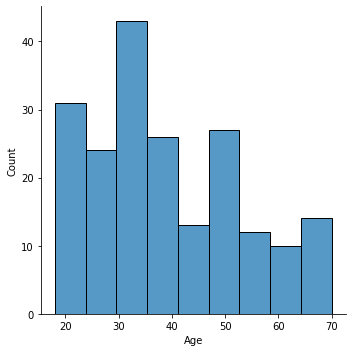

In [76]:
sns.displot(df['Age'])

In [77]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

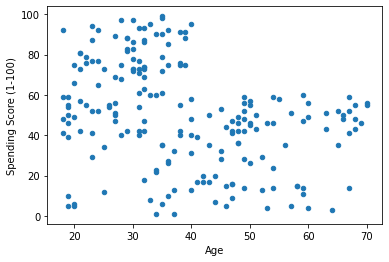

In [78]:
df.plot(kind = 'scatter',x='Age',y='Spending Score (1-100)')

<AxesSubplot:xlabel='Genre'>

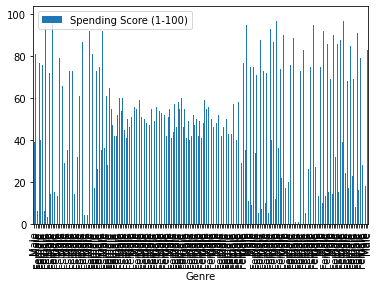

In [79]:
df.plot(kind = 'bar',x='Genre',y='Spending Score (1-100)')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


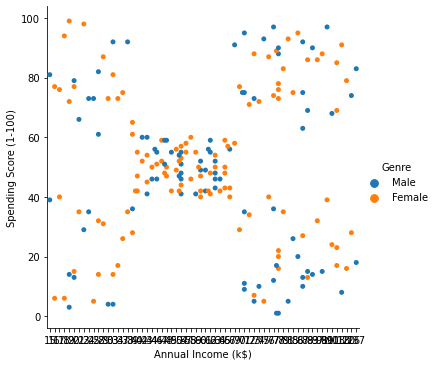

In [80]:
sns.catplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre", kind="swarm", data=df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points

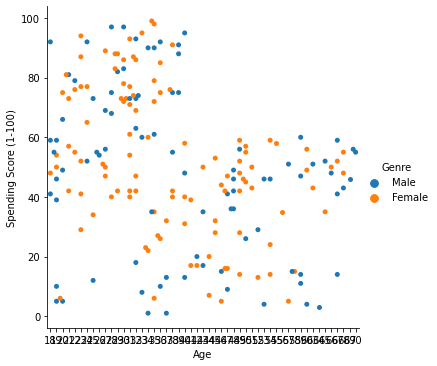

In [81]:
sns.catplot(x="Age", y="Spending Score (1-100)", hue="Genre", kind="swarm", data=df)

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

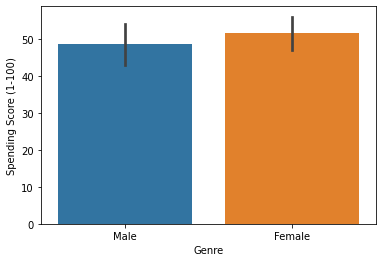

In [82]:
sns.barplot(x='Genre',y='Spending Score (1-100)',data=df)

In [83]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

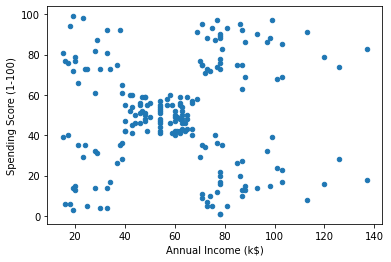

In [84]:
df.plot(kind = 'scatter',x='Annual Income (k$)',y='Spending Score (1-100)')

In [85]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [86]:
df1 = pd.get_dummies(df)

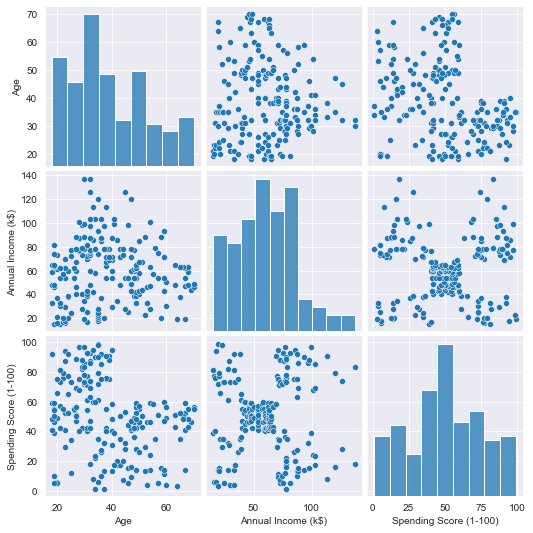

In [87]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [88]:
x = df1.drop('Spending Score (1-100)',axis=1)
y = df1['Spending Score (1-100)']

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 44)

In [91]:
lr = LinearRegression()

In [92]:
model = lr.fit(x_train,y_train)

In [93]:
preds= model.predict(x_test)

In [94]:
r2_score(y_test,preds)

0.13680930829203763

In [95]:
#poor model as no relationship in dataset

In [96]:
df = pd.read_csv("/Users/users/Downloads/drive-download-20201124T124254Z-001/Multi-Linear/Toyoto_Corrola (1).csv")

In [97]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [98]:
data = df.drop(['Model','Id'],axis=1)

In [99]:
data.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [101]:
df['Cylinders'].value_counts()

4    1436
Name: Cylinders, dtype: int64

In [102]:
data['Doors'] = data['Doors'].astype('category')

In [103]:
data['Gears'] = data['Gears'].astype('category')

In [104]:
data['Cylinders'] = data['Cylinders'].astype('category')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors', ylabel='count'>

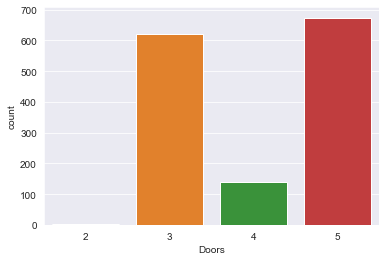

In [105]:
sns.countplot(data['Doors'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_08_04'>

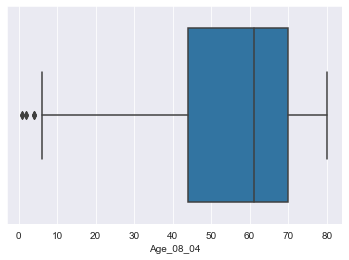

In [106]:
sns.boxplot(df['Age_08_04'])

In [107]:
data.describe()

,Price,Age_08_04,KM,HP,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1615.00000


In [108]:
df['KM'].sort_values

<bound method Series.sort_values of 0       46986
1       72937
2       41711
3       48000
4       38500
        ...  
1431    20544
1432    19000
1433    17016
1434    16916
1435        1
Name: KM, Length: 1436, dtype: int64>

<AxesSubplot:xlabel='KM', ylabel='Price'>

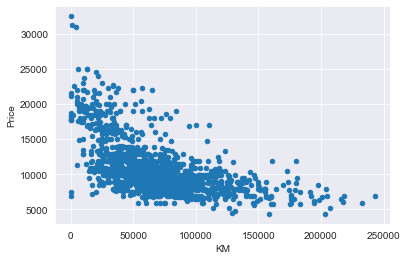

In [109]:
data.plot(kind = 'scatter',x='KM',y='Price')

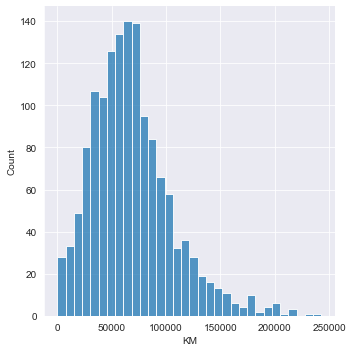

In [110]:
sns.displot(df['KM'])

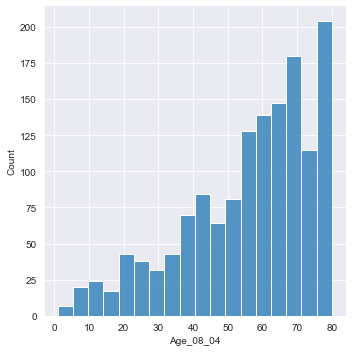

In [111]:
sns.displot(df['Age_08_04'])

In [112]:
data['Age_08_04'] = data['Age_08_04'].apply(np.log1p)

In [113]:
data.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,3.178054,46986,90,3,4,5,1165
1,13750,3.178054,72937,90,3,4,5,1165
2,13950,3.218876,41711,90,3,4,5,1165
3,14950,3.295837,48000,90,3,4,5,1165
4,13750,3.433987,38500,90,3,4,5,1170


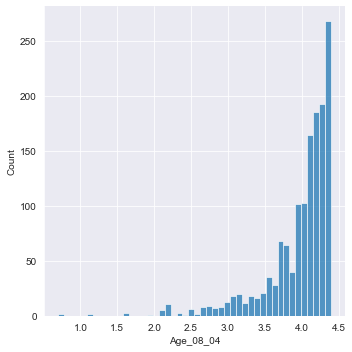

In [114]:
sns.displot(data['Age_08_04'])

In [115]:
data.describe()

,Price,Age_08_04,KM,HP,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,3.956080,68533.259749,101.502089,1072.45961
std,3626.964585,0.485564,37506.448872,14.981080,52.64112
min,4350.000000,0.693147,1.000000,69.000000,1000.00000
25%,8450.000000,3.806662,43000.000000,90.000000,1040.00000
50%,9900.000000,4.127134,63389.500000,110.000000,1070.00000
75%,11950.000000,4.262680,87020.750000,110.000000,1085.00000
max,32500.000000,4.394449,243000.000000,192.000000,1615.00000


In [116]:
data['KM'] = data['KM'].apply(np.log1p)

In [117]:
data.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,3.178054,10.757626,90,3,4,5,1165
1,13750,3.178054,11.197365,90,3,4,5,1165
2,13950,3.218876,10.638544,90,3,4,5,1165
3,14950,3.295837,10.778977,90,3,4,5,1165
4,13750,3.433987,10.558439,90,3,4,5,1170


In [118]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [119]:
df_cat = data.select_dtypes(include='category')

In [120]:
df_cat = pd.get_dummies(df_cat)


In [121]:
df_num = data.select_dtypes(exclude='category')

In [122]:
df_num = df_num.drop('Price',axis=1)

In [123]:
df_num.head()

,Age_08_04,KM,HP,Weight
0,3.178054,10.757626,90,1165
1,3.178054,11.197365,90,1165
2,3.218876,10.638544,90,1165
3,3.295837,10.778977,90,1165
4,3.433987,10.558439,90,1170


In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
sl = MinMaxScaler()


In [126]:
s = sl.fit_transform(df_num)

In [127]:
df_num_final = pd.DataFrame(s,columns=df_num.columns,index=df_num.index)

In [128]:
df_num_final.head()

,Age_08_04,KM,HP,Weight
0,0.671360,0.859648,0.170732,0.268293
1,0.671360,0.897208,0.170732,0.268293
2,0.682389,0.849477,0.170732,0.268293
3,0.703182,0.861472,0.170732,0.268293
4,0.740507,0.842635,0.170732,0.276423


In [129]:
df_cat.head()

,Doors_2,Doors_3,Doors_4,Doors_5,Cylinders_4,Gears_3,Gears_4,Gears_5,Gears_6
0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,1,0
2,0,1,0,0,1,0,0,1,0
3,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,1,0


In [130]:
df['Price'].head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [131]:
df_final = pd.concat([df_cat,df_num_final,df["Price"]],axis=1)

In [132]:
df_final.head()

,Doors_2,Doors_3,Doors_4,Doors_5,Cylinders_4,Gears_3,Gears_4,Gears_5,Gears_6,Age_08_04,KM,HP,Weight,Price
0,0,1,0,0,1,0,0,1,0,0.671360,0.859648,0.170732,0.268293,13500
1,0,1,0,0,1,0,0,1,0,0.671360,0.897208,0.170732,0.268293,13750
2,0,1,0,0,1,0,0,1,0,0.682389,0.849477,0.170732,0.268293,13950
3,0,1,0,0,1,0,0,1,0,0.703182,0.861472,0.170732,0.268293,14950
4,0,1,0,0,1,0,0,1,0,0.740507,0.842635,0.170732,0.276423,13750


In [133]:
x = df_final.drop('Price',axis=1)
y = df_final["Price"]

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 69669)

In [136]:
lm = LinearRegression()

In [137]:
modellm = lm.fit(x_train,y_train)

In [138]:
preds = modellm.predict(x_test)

In [139]:
r2_score(y_test,preds)

0.8728779408091518

In [140]:
r2_score(y_train,modellm.predict(x_train))

0.8321463618155611

In [141]:
from sklearn.model_selection import cross_validate

In [142]:
lm_cv = cross_validate(modellm, x,y, cv = 10, return_train_score=True)

In [143]:
lm_cv

{'fit_time': array([0.00434613, 0.003582  , 0.003613  , 0.00349903, 0.00317693,
        0.00392389, 0.00284505, 0.00292993, 0.00312328, 0.00252008]),
 'score_time': array([0.00226593, 0.00208402, 0.00246596, 0.00202394, 0.00204921,
        0.00228596, 0.00198507, 0.00193501, 0.00191188, 0.00159001]),
 'test_score': array([ 1.86626551e-01,  4.14521251e-01,  4.83073994e-01, -9.39544794e-02,
         5.80298969e-02,  5.90881437e-02, -7.92775394e+23,  9.90710667e-02,
        -5.55320160e-01, -4.26589560e+20]),
 'train_score': array([0.75013936, 0.85920833, 0.85150318, 0.8529837 , 0.8491451 ,
        0.8455106 , 0.84623726, 0.84675655, 0.83824665, 0.84360222])}

In [144]:
lm_cv['train_score'].mean()

0.838333294543399

In [145]:
from sklearn.linear_model import Ridge,Lasso

In [146]:
r = Ridge()

In [147]:
modelr = r.fit(x_train,y_train)

In [148]:
r2_score(y_test,modelr.predict(x_test))

0.8702855403341172

In [149]:
r2_score(y_train,modelr.predict(x_train))

0.8294628522485189

In [150]:
l = Lasso()

In [151]:
modell = l.fit(x_train,y_train)

In [152]:
r2_score(y_test,modell.predict(x_test))

0.8729901025767675

In [153]:
r2_score(y_train,modell.predict(x_train))

0.8320939921810716

In [154]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold

In [155]:
modele = ElasticNet(alpha=1.0, l1_ratio=0.5)  #model define

In [156]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)  #cv define

In [157]:
import numpy as np
import scipy as stat
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
dt = DecisionTreeRegressor()


In [160]:
modeldt = dt.fit(x_train,y_train)

In [161]:
r2_score(y_test,modeldt.predict(x_test))

0.8570995166391245

In [162]:
r2_score(y_train,modeldt.predict(x_train))

0.9999986252386049

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
rf = RandomForestRegressor()

In [165]:
modelrf = rf.fit(x_train,y_train)

In [166]:
r2_score(y_train,modelrf.predict(x_train))

0.9858670272899137

In [167]:
r2_score(y_test,modelrf.predict(x_test
                        ))

0.9120235582632216

In [168]:
#Classification algorithms

In [169]:
import numpy as np
import scipy as stat
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [170]:
df = pd.read_csv("/Users/users/Downloads/insurance2.csv")

In [171]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [173]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [174]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [175]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [176]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [177]:
df["sex"] = df["sex"].astype('category')

In [178]:
df["children"] = df["children"].astype('category')

In [179]:
df["smoker"] = df["smoker"].astype('category')

In [180]:
df["region"] = df["region"].astype('category')

In [181]:
df["insuranceclaim"] = df['insuranceclaim'].astype('category')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             1338 non-null   int64   
 1   sex             1338 non-null   category
 2   bmi             1338 non-null   float64 
 3   children        1338 non-null   category
 4   smoker          1338 non-null   category
 5   region          1338 non-null   category
 6   charges         1338 non-null   float64 
 7   insuranceclaim  1338 non-null   category
dtypes: category(5), float64(2), int64(1)
memory usage: 38.7 KB


In [183]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

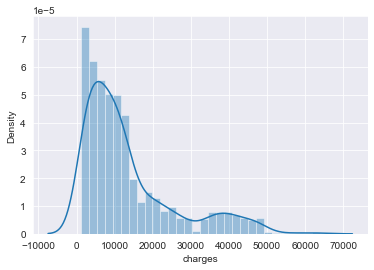

In [184]:
sns.distplot(df['charges'])

In [185]:
df["charges"] = df["charges"].apply(np.log1p)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

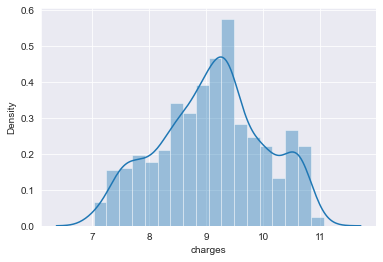

In [186]:
sns.distplot(df['charges'])

In [187]:
df_num = df.select_dtypes(exclude='category')

In [188]:
df_num.head()

,age,bmi,charges
0,19,27.900,9.734236
1,18,33.770,7.453882
2,28,33.000,8.400763
3,33,22.705,9.998137
4,32,28.880,8.260455


In [189]:
df_cat = df.select_dtypes(include='category')

In [190]:
df_cat = df_cat.drop('insuranceclaim',axis=1)

In [191]:
df_cat.head()

,sex,children,smoker,region
0,0,0,1,3
1,1,1,0,2
2,1,3,0,2
3,1,0,0,1
4,1,0,0,1


In [192]:
df_cat0 = pd.get_dummies(df_cat)

In [193]:
df_cat0.shape

(1338, 14)

In [194]:
from sklearn.preprocessing import MinMaxScaler

In [195]:
sc = MinMaxScaler()

In [196]:
df_sc = sc.fit_transform(df_num)

In [197]:
df_num0 = pd.DataFrame(df_sc,index=df_num.index,columns=df_num.columns)

In [198]:
df_num0.head()

,age,bmi,charges
0,0.021739,0.321227,0.671035
1,0.000000,0.479150,0.106509
2,0.217391,0.458434,0.340920
3,0.326087,0.181464,0.736367
4,0.304348,0.347592,0.306185


In [199]:
df_final = pd.concat([df_num0,df_cat0,df["insuranceclaim"]],axis=1)

In [200]:
df_final.head()

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_0,region_1,region_2,region_3,insuranceclaim
0,0.021739,0.321227,0.671035,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1
1,0.000000,0.479150,0.106509,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
2,0.217391,0.458434,0.340920,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0.326087,0.181464,0.736367,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0.304348,0.347592,0.306185,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1


In [201]:
x = df_final.drop("insuranceclaim",axis=1)

In [202]:
y = df_final["insuranceclaim"]

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 45)

In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [207]:
lr = LogisticRegression()

In [208]:
modello = lr.fit(x_train,y_train)

In [209]:
pred = modello.predict(x_test)

In [210]:
confusion_matrix(y_test,pred)

array([[ 97,  26],
       [ 15, 130]])

In [211]:
accuracy_score(y_test,pred)

0.8470149253731343

In [212]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       123
           1       0.83      0.90      0.86       145

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



In [213]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
dt = DecisionTreeClassifier()

In [215]:
modeldt = dt.fit(x_train,y_train)

In [216]:
predt = modeldt.predict(x_test)

In [217]:
confusion_matrix(y_test,predt)

array([[120,   3],
       [  3, 142]])

In [218]:
accuracy_score(y_test,predt)

0.9776119402985075

In [219]:
print(classification_report(y_test,predt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.98      0.98      0.98       145

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rf =  RandomForestClassifier()

In [222]:
modelrf = rf.fit(x_train,y_train)

In [223]:
predr = modelrf.predict(x_test)

In [224]:
confusion_matrix(y_test,predr)

array([[120,   3],
       [  7, 138]])

In [225]:
accuracy_score(y_test,predr)

0.9626865671641791

In [226]:
print(classification_report(y_test,predr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       123
           1       0.98      0.95      0.97       145

    accuracy                           0.96       268
   macro avg       0.96      0.96      0.96       268
weighted avg       0.96      0.96      0.96       268



In [227]:
import numpy as np
import pandas as pd

In [228]:
df = pd.read_csv("/Users/users/Downloads/dataset.csv")

In [229]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [231]:
df["date"] = pd.to_datetime(df["date"])

In [232]:
df = df.drop(["time","date","username"],axis=1)

In [233]:
df["activity"].value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [234]:
df["wrist"] = df["wrist"].astype("category")

In [235]:
df["activity"] = df["activity"].astype("category")

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   wrist           88588 non-null  category
 1   activity        88588 non-null  category
 2   acceleration_x  88588 non-null  float64 
 3   acceleration_y  88588 non-null  float64 
 4   acceleration_z  88588 non-null  float64 
 5   gyro_x          88588 non-null  float64 
 6   gyro_y          88588 non-null  float64 
 7   gyro_z          88588 non-null  float64 
dtypes: category(2), float64(6)
memory usage: 4.2 MB


In [237]:
df_num = df.drop(["activity","wrist"],axis=1)

In [238]:
df_num.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [239]:
df_cat = df["wrist"]

In [240]:
df_cat.head()

0    0
1    0
2    0
3    0
4    0
Name: wrist, dtype: category
Categories (2, int64): [0, 1]

In [241]:
df_cat = pd.get_dummies(df_cat) 

In [242]:
from sklearn.preprocessing import MinMaxScaler

In [243]:
sc = MinMaxScaler()

In [244]:
df_sc = sc.fit_transform(df_num)

In [245]:
df_num1 = pd.DataFrame(df_sc,index=df_num.index,columns=df_num.columns)

In [246]:
df_num1.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.512653,0.421921,0.694500,0.469822,0.469670,0.315740
1,0.549827,0.364622,0.652454,0.457280,0.468937,0.463068
2,0.528620,0.304558,0.709293,0.378310,0.474293,0.339498
3,0.516131,0.416709,0.712371,0.489049,0.441955,0.315547
4,0.532409,0.396816,0.702564,0.481827,0.495067,0.577079


In [247]:
df_final = pd.concat([df_num1,df_cat,df["activity"]],axis=1)

In [248]:
df_final.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,0,1,activity
0,0.512653,0.421921,0.694500,0.469822,0.469670,0.315740,1,0,0
1,0.549827,0.364622,0.652454,0.457280,0.468937,0.463068,1,0,0
2,0.528620,0.304558,0.709293,0.378310,0.474293,0.339498,1,0,0
3,0.516131,0.416709,0.712371,0.489049,0.441955,0.315547,1,0,0
4,0.532409,0.396816,0.702564,0.481827,0.495067,0.577079,1,0,0


In [249]:
x = df.drop("activity",axis=1)

In [250]:
y = df["activity"]

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=3434)

In [253]:
from sklearn.naive_bayes import GaussianNB

In [254]:
gb = GaussianNB()

In [255]:
modelnb = gb.fit(x_train,y_train)

In [256]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [257]:
accuracy_score(y_test,modelnb.predict(x_test))

0.9561274786469504

In [258]:
accuracy_score(y_train,modelnb.predict(x_train))

0.9573140249310607

In [259]:
confusion_matrix(y_test,modelnb.predict(x_test))

array([[13084,   146],
       [ 1020, 12327]])

In [260]:
print(classification_report(y_test,modelnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13230
           1       0.99      0.92      0.95     13347

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



In [261]:
 pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [262]:
from imblearn.over_sampling import SMOTE

In [263]:
sm = SMOTE()

In [264]:

x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [265]:
modelnb.fit(x_train_sm,y_train_sm)

GaussianNB()

In [266]:
accuracy_score(y_test,modelnb.predict(x_test))

0.9560522256086089

In [267]:
from sklearn.svm import SVC

In [268]:
svm = SVC()

In [269]:
modelsvm = svm.fit(x_train,y_train)

In [270]:
accuracy_score(y_test,modelsvm.predict(x_test))

0.9893893215938594

In [271]:
accuracy_score(y_train,modelsvm.predict(x_train))

0.989018077437874

In [272]:
print(classification_report(y_test,modelsvm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13230
           1       0.99      0.99      0.99     13347

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



In [273]:
from sklearn.model_selection import cross_validate

In [274]:
nb_cv = cross_validate(modelnb,x,y,cv=10,return_train_score=True)

In [275]:
nb_cv["test_score"].mean()

0.9552531849735569

In [276]:
nb_cv["train_score"].mean()

0.9570119793436666

In [ ]:
svm_cv = cross_validate(modelsvm,x,y,cv=10,return_train_score=True)

In [ ]:
svm_cv["test_score"].mean()

In [ ]:
#clustering 

In [ ]:
df = pd.read_csv("/Users/users/Downloads/zoo.csv")

In [ ]:
df.head()

In [ ]:
df = df.drop("animal_name",axis=1)

In [ ]:
df = df.drop("class_type",axis=1)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
from  sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters=5,linkage="average", affinity="cosine")

In [ ]:
model.fit(df)

In [ ]:
model.labels_

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()

In [ ]:
df_sc = sc.fit_transform(df)

In [ ]:
df_new = pd.DataFrame(df_sc,index=df.index,columns=df.columns)

In [ ]:
df_new.head()

In [ ]:
model.fit(df_new)

In [ ]:
model.labels_

In [ ]:
df["cluster"] = model.labels_

In [ ]:
df.head()

In [ ]:
df.to_csv("cluster.csv")

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (12,5))
den = shc.dendrogram((shc.linkage(df, method="ward")))

In [ ]:
df = pd.read_csv("/Users/users/Downloads/driver-data.csv")

In [ ]:
df.head()

In [ ]:
fea = df.drop('id',axis=1)

In [ ]:
fea.head()

In [ ]:
from  sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=5)

In [ ]:
model.fit(fea)

In [ ]:
model.labels_

In [ ]:
df["lables"] = model.labels_

In [ ]:
df.head()

In [ ]:
df.groupby('lables').apply(np.mean)

In [ ]:
wss =[]

for i in range(1,15):
    km = KMeans(n_clusters=i, init="k-means++")
    km.fit(fea)
    wss.append(km.inertia_)

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1,15), wss, marker="o", color="red")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/Users/users/Downloads/pima-indians-diabetes.csv")

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df["Pregnancies"] = df["Pregnancies"].astype('category')
df["Outcome"] = df["Outcome"].astype('category')

In [ ]:
df.describe()

In [ ]:
df["Age"] = df["Age"].apply(np.log1p)

In [ ]:
df["Insulin"] = df["Insulin"].apply(np.log1p)

In [ ]:
df["Glucose"] = df["Glucose"].apply(np.log1p)
df["BloodPressure"] = df["BloodPressure"].apply(np.log1p)
df["SkinThickness"] = df["SkinThickness"].apply(np.log1p)

In [ ]:
df_num = df.select_dtypes(include=["int64","float64"])

In [ ]:
df_num.head()

In [ ]:
df_cat = df.select_dtypes(exclude=["int64","float64"])

In [ ]:
df_cat = df_cat.drop("Outcome",axis=1)

In [ ]:
df_cat.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()

In [ ]:
df_sc = sc.fit_transform(df_num)

In [ ]:
df_cat1 = pd.get_dummies(df_cat)

In [ ]:
df_num1 = pd.DataFrame(df_sc,index=df_num.index,columns=df_num.columns)

In [ ]:
df_num1.head()

In [ ]:
df_cat1.head()

In [ ]:
df_final= pd.concat([df_num1,df_cat1,df["Outcome"]],axis=1)

In [ ]:
df_final.head()

In [ ]:
x= df_final.drop('Outcome',axis=1)
y = df_final["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=34)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=20)

In [ ]:
ada.fit(x_train,y_train)

In [ ]:
pred = ada.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
accuracy_score(y_train, ada.predict(x_train))

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv = cross_validate(ada,x,y,cv=10,return_train_score=True)

In [ ]:
cv["test_score"].mean()

In [ ]:
cv["train_score"].mean()

In [ ]:
pip install xgboost

In [ ]:
import xgboost 